In [11]:
import os
import cv2  # For image processing
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from tensorflow.keras import layers, models

In [12]:
def load_images_from_folder(folder, label, img_size=(256, 256)):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Read in grayscale
        if img is not None:
            img = cv2.resize(img, img_size)  # Resize to (150, 150)
            img = img / 255.0  # Normalize between 0 and 1
            images.append(img)
            labels.append(label)
    return np.array(images), np.array(labels)

cats_folder = 'K:/Computer Science/AI-ML-DL/ML-Lab/cats'
dogs_folder = 'K:/Computer Science/AI-ML-DL/ML-Lab/dogs'

# Load cat and dog images
cat_images, cat_labels = load_images_from_folder(cats_folder, label=0)  # Label for cats is 0
dog_images, dog_labels = load_images_from_folder(dogs_folder, label=1)  # Label for dogs is 1

In [13]:
X = np.concatenate((cat_images, dog_images), axis=0)  # Combine cat and dog images
y = np.concatenate((cat_labels, dog_labels), axis=0)  # Combine cat and dog labels

X, y = shuffle(X, y, random_state=42)

X = X.reshape(X.shape[0], X.shape[1], X.shape[2], 1)
print(X.shape)

(140, 256, 256, 1)


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

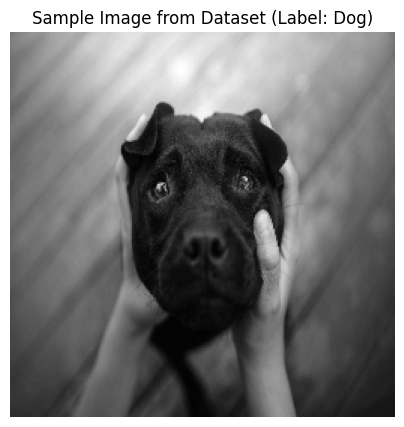

In [15]:
plt.figure(figsize=(5, 5))
plt.imshow(X_train[0].reshape(256, 256), cmap='gray')
plt.title(f"Sample Image from Dataset (Label: {'Cat' if y_train[0] == 0 else 'Dog'})")
plt.axis('off')
plt.show()

In [16]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 1)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

k:\Computer Science\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_test, y_test)
)

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 340ms/step - accuracy: 0.5568 - loss: 1.1727 - val_accuracy: 0.5714 - val_loss: 0.6870
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 302ms/step - accuracy: 0.4432 - loss: 0.7005 - val_accuracy: 0.5357 - val_loss: 0.6901
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 288ms/step - accuracy: 0.5518 - loss: 0.6925 - val_accuracy: 0.4286 - val_loss: 0.7016
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 298ms/step - accuracy: 0.5188 - loss: 0.6896 - val_accuracy: 0.5714 - val_loss: 0.6870
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 305ms/step - accuracy: 0.5018 - loss: 0.6840 - val_accuracy: 0.5714 - val_loss: 0.6822
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 304ms/step - accuracy: 0.5427 - loss: 0.6648 - val_accuracy: 0.4643 - val_loss: 0.7416
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 301ms/step - accuracy: 0.6176 - loss: 0.6373 - val_accuracy: 0.3929 - val_loss: 0.7402
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 307ms/step - accuracy: 0.7286 - loss: 0.5445 - val_accuracy: 0.4286 - val_loss:

In [18]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_acc}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.5000 - loss: 1.6654
Test Loss: 1.665424108505249, Test Accuracy: 0.5


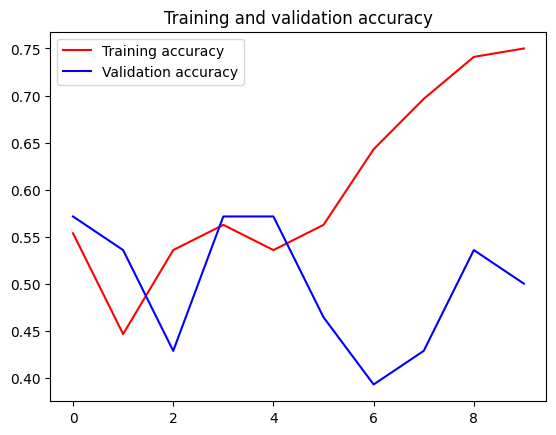

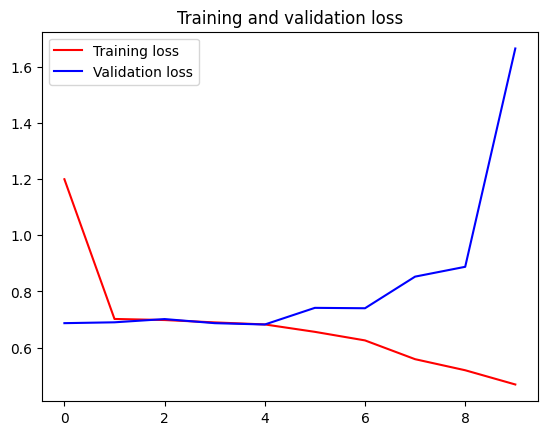

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


<>:15: SyntaxWarning: invalid escape sequence '\C'
<>:15: SyntaxWarning: invalid escape sequence '\C'
C:\Users\krish\AppData\Local\Temp\ipykernel_6532\1832661091.py:15: SyntaxWarning: invalid escape sequence '\C'
  load_and_predict('K:\Computer Science\AI-ML-DL\ML-Lab\cats\cat_118.jpg')


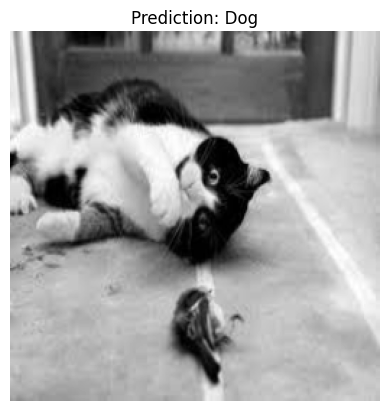

In [20]:
def load_and_predict(img_path):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (256, 256))
    img = img / 255.0
    img = np.expand_dims(img, axis=-1)  # Add the channel dimension
    img = np.expand_dims(img, axis=0)  # Add the batch dimension

    prediction = model.predict(img)

    plt.imshow(img[0].reshape(256, 256), cmap='gray')
    plt.title(f"Prediction: {'Dog' if prediction[0] > 0.5 else 'Cat'}")
    plt.axis('off')
    plt.show()

load_and_predict('K:\Computer Science\AI-ML-DL\ML-Lab\cats\cat_118.jpg')

In [21]:
model.save('cat_dog_classifier.keras')